# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Sophie Hodgson
#### &#9989; Last Updated on 4/4/24

# ___Analyzing The Accuracy of Fourier Series Approximations for Periodic Functions___

##  Introduction 

_(Provide context for the problem: Background and Motivation.  **Clearly state the question(s) you set
out to answer.**)_

The Fourier Series Transform is useful for approximating periodic functions. This approximation works by fitting period functions to sine or cosine waves which are altered via calculated coefficients and phase shifts. The official definition of the Fourier series decomposition is:

$$f(x) = \Sigma c_n e^{i2\pi \frac{n}{P}x}$$

Where $c_n =  \frac{1}{P} \int_{-P/2}^{P/2} f(x)e^{i2\pi \frac{n}{P}x} dx$ and $x   \epsilon   [-P/2, P/2]$, where P is the period of the function and n is the number of terms you want.

However, a simplified version of this equation will be used, which is as follows:

$$
f(t) = a_0 + \Sigma a_n cos(n\omega_0 t) + b_n sin(n\omega_0 t)
$$

Where $\omega_0 =  \frac{2\pi}{T_0}$, where $T_0$ is the period of the function. $a_0$ represents the offset if the function isn't centered around zero. The coefficients $a_n$, $b_n$, and $a_0$ are given by:

$
a_n = \frac{2}{T_0} \int_{-T_0/2}^{T_0/2} f(t) cos(n\omega_0t)
$

$
b_n = \frac{2}{T_0} \int_{-T_0/2}^{T_0/2} f(t) sin(n\omega_0t)
$

$
a_0 = \frac{1}{T_0} \int_{0}^{T_0} f(t) dt
$

Where f(t) is the periodic function itself. These versions are much easier to code, and are equivalent to the real part of the first versions.

These approximations can come in handy when the function being approximated is complex, as it allows for some simplification, depending on how many terms are used. Another use for the Fourier transform is breaking down complex signals into their composite frequenceies, however that won't be covered in this project.

Throughout this project I aim to assess the accuracy of the Fourier series transform for four different periodic functions: the square function, the triangle function, the sawtooth function, and a custom periodic "challenge" function. Furthermore, both the periodic functions themselves and their most accurate Fourier series will be inputted into a damped, driven oscillator to see how the motion of the oscillator differs between the two.

The questions I aim to answer are as follows:
1. What is the minimum number of terms needed in a Fourier series to have a 99% accuracy?
2. How does the accuracy of the series differ between the different periodic functions?
3. How does the motion of a damped, driven oscillator differ between the actual periodic function and its Fourier series?

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

I will begin with a simple square periodic function. This can be loaded in using the scipy package. First, I begin by making an array of timesteps that will be used to calculate the periodic function and it's corresponding fourier series. I use the natural frequency of 2$\pi$ for the input of the square function. This value is used AS the period of the square function is 1. A plot of the square periodic function is shown below.

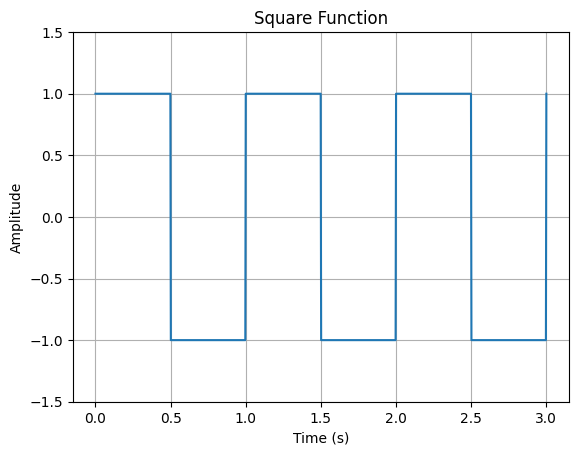

In [2]:
#any constants here
pi = np.pi
T = 1
w_0 = (2*pi)/T

#creating time series and the square periodic function
t = np.linspace(0,3, 1000)
square = sig.square(w_0*t)

#plotting the square function
plt.plot(t, square, label='Square')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Square Function');

Now I can begin the fourier series approximation. The first step is to calculate the coeeficients $a_0$, $a_n$, and $b_n$. In order to solve this problem by hand instead of using a numerical integrator, the square function must be translated into a piecewise function. This function can be approximated as:

$$
f(x) =
\begin{cases}
    1 & \text{for } 0 < t < \frac{T_0}{2} \\
    -1 & \text{for } \frac{T_0}{2} < t < T_0 \\
\end{cases}
$$

From here we can calulate each of the coefficients by splitting the integrals across the piecewise function. The resulting coefficients are as follows:

$a_0 = 0$

$a_n = 0 $ as $sin(n\pi)$ goes to zero for whole integer values of n.

$b_n = \frac{2}{n\pi} (1-cos(n\pi)) $

Now that we have our coefficients, I can build the fourier series approximation. The approximation will depend on how many terms I want to include. For exploration purposes, I will start with five terms, and then assess the accuracy to see if more terms are needed. 

I'll begin by creating functions that calculate the coefficient for each term, and then calculate each term. Then I'll use that in a for loop to calculate each term in the fourier series. 

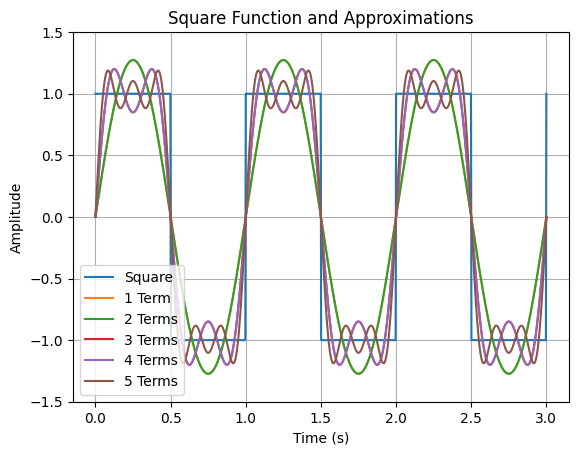

In [3]:
#define functions for the coefficients and calculating each term
def coefficients(n):
    '''Take in the term number n, return the bn coefficient for this term'''
    return (2/(n*pi))*(1-np.cos(n*pi))

def n_term(n, t):
    '''Take in the term number and the time array, return the correct term for the fourier series, which 
    has been evaluated for the time array'''
    return coefficients(n) * np.sin(n* w_0 * t)

#calculate up to term 5
n_list = np.arange(1,6,1)
a_0 = 0
storage = []
for i in range(len(n_list)):
    term = n_term(n_list[i], t)
    storage.append(term)

#add all the terms together to get the series instead of each term individually
for i in range(5):
    if i ==0:
        storage[i] = a_0 + storage[i]
    else:
        storage[i] = storage[i-1] + storage[i]      

#plotting the square function and the approximations
plt.plot(t, square, label='Square')
plt.plot(t, storage[0], label = '1 Term')
plt.plot(t, storage[1], label = '2 Terms')
plt.plot(t, storage[2], label = '3 Terms')
plt.plot(t, storage[3], label = '4 Terms')
plt.plot(t, storage[4], label = '5 Terms')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Square Function and Approximations')
plt.legend();

To start off the accuracy assessment, I create a function for assessing the accuracy of a dataset against a reference set. To do this I use a simple difference formula, where I calculate the difference of each point in the dataset from the corresponding reference point. Then I can turn this into a percent, and subtract it from 100 to get the percent accuracy.

In [4]:
def accuracy(ref, actual):
    '''Takes in two arrays, the reference and the actual. This will compare the reference and the actual
    to determine the average percent accuracy of the actual'''
    difference = []
    for i in range(len(ref)):
        difference.append(np.abs(ref[i]-actual[i]))
    percent = np.average(difference) * 100
    return 100 - percent

Now that I have the percent accuracy function written, I can test the accuracy of the fifth term fourier series approximation to see if it's close to 99%. Qualitative analysis suggests that it's not close to being 99% accurate at only five terms, however I'd like a quantitative number to get an idea of how many more terms may be needed.

In [5]:
for term in storage:
    print('Percent accuracy is:', accuracy(square, term), '%')

Percent accuracy is: 65.62683084003214 %
Percent accuracy is: 65.62683084003214 %
Percent accuracy is: 78.10078532784819 %
Percent accuracy is: 78.10078532784819 %
Percent accuracy is: 83.57669657057481 %


As shown above, the fifth term has around 83% accuracy. The next step is to make a function that runs through terms until it reaches 99% accuracy. 

In [6]:
def runtill_99(ref, t):
    '''Takes in the reference function and the time array and runs through terms until a 99% accuracy is reached.
    Returns the evaluated term for 99% accuracy and the term number.'''
    
    target = 99
    accuracy_ = 0
    term_num = 1
    storage = []
    index = 0
    
    while accuracy_ < target:
        term = n_term(term_num, t)
        storage.append(term)
        if index ==0:
            storage[index] = storage[index] + a_0
        else:
            storage[index] = storage[index] + storage[index-1]
        
        accuracy_ = accuracy(ref, storage[index])
        
        term_num+=1
        index+=1
        
    return storage[-1], len(storage)

99% accurate with 227 terms.


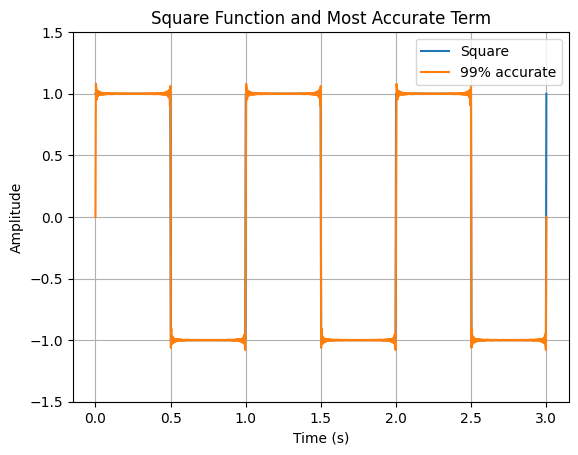

In [7]:
last_term, term_number = runtill_99(square, t)
print('99% accurate with', term_number, 'terms.')

#plotting the square function
plt.plot(t, square, label='Square')
plt.plot(t, last_term, label='99% accurate')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Square Function and Most Accurate Term')
plt.legend();

As you can see from the above graph and print statement, 99% accuracy is achieveable, but with a very large number of terms. For the square function it takes 227 terms to achieve 99% accuracy.

Now I switch to analyzing the triangle periodic function. I follow the same steps as with the square function, which will be shortened for organization sake. As the scipy package doesn't include a triangle function, I create my own using a function.

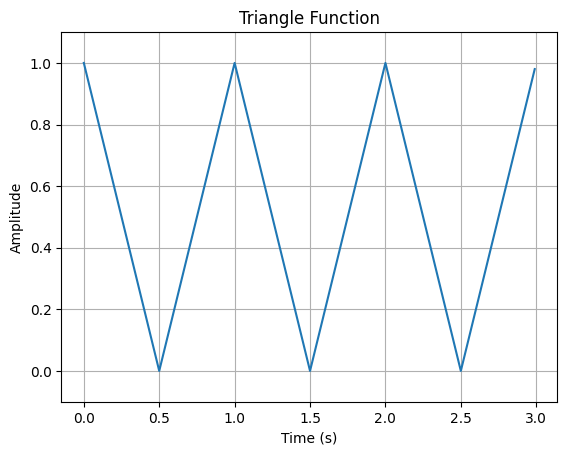

In [8]:
#creating trianlge function
def triangle_fctn(t, T):
    '''Takes in the t values and the period of the function to calcualte a triangle periodic function'''
    if t>= 0 and t<T/2:
        return 1-2*t
    if T/2<= t and t<T:
        return 2*t-1

t = np.arange(0,T,0.01)
values = []
times = np.arange(0,3*T,0.01)
for i in range(len(t)):
    values.append(triangle_fctn(t[i], T))
    
triangle = values*3

#plotting the triangle function
plt.plot(times, triangle, label='Triangle')
plt.ylim(-0.1,1.1)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Triangle Function');

The coefficients were found to be:

$a_0 = 1/2$

$a_n = \frac{-2(-1)^n+2}{\pi^2n^2}$

$b_n = 0$ as the function is best approximated as a cosine wave, so the coefficients will go to zero, as shown in the square wave with the $a_n$ coefficients.

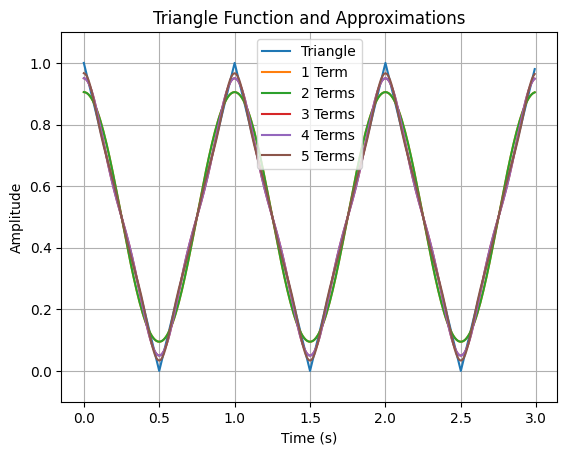

In [9]:
def coefficients(n):
    '''Take in the term number n, return the an coefficient for this term'''
    return (-2*(-1)**n +2)/(pi**2 * n**2)

def n_term(n, t):
    '''Take in the term number and the time array, return the correct term for the fourier series, which 
    has been evaluated for the time array'''
    return coefficients(n) * np.cos(n* w_0 * t)

#calculate up to term 5
n_list = np.arange(1,6,1)
a_0 = 1/2
storage = []
for i in range(len(n_list)):
    term = n_term(n_list[i], times)
    storage.append(term)

#add all the terms together to get the series instead of each term individually
for i in range(5):
    if i ==0:
        storage[i] = a_0 + storage[i]
    else:
        storage[i] = storage[i-1] + storage[i]      

#plotting the square function and the approximations
plt.plot(times, triangle, label='Triangle')
plt.plot(times, storage[0], label = '1 Term')
plt.plot(times, storage[1], label = '2 Terms')
plt.plot(times, storage[2], label = '3 Terms')
plt.plot(times, storage[3], label = '4 Terms')
plt.plot(times, storage[4], label = '5 Terms')
plt.ylim(-0.1,1.1)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Triangle Function and Approximations')
plt.legend();

In [10]:
for term in storage:
    print('Percent accuracy is:', accuracy(triangle, term), '%')

Percent accuracy is: 97.0644389516411 %
Percent accuracy is: 97.0644389516411 %
Percent accuracy is: 98.88188509533133 %
Percent accuracy is: 98.88188509533133 %
Percent accuracy is: 99.40183516936678 %


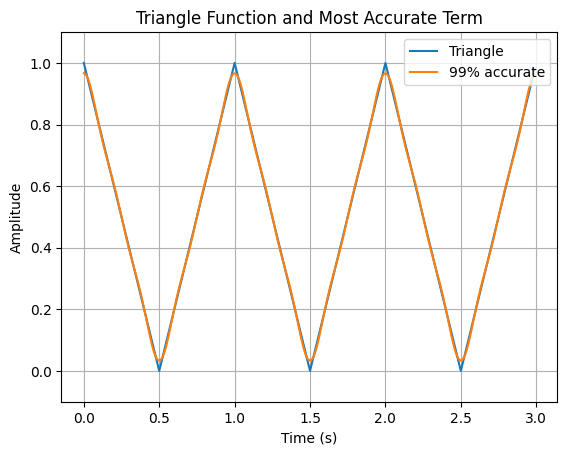

In [11]:
#plotting the triangle function
plt.plot(times, triangle, label='Triangle')
plt.plot(times, storage[-1], label='99% accurate')
plt.ylim(-0.1,1.1)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Triangle Function and Most Accurate Term')
plt.legend();

As you can see from the printout of the accuracy of the first five terms, the fifth term reaches 99% accuracy so I don't need to run the function that finds the most accurate term.

I now move on to the sawtooth function, using the same steps as the first two periodic functions.

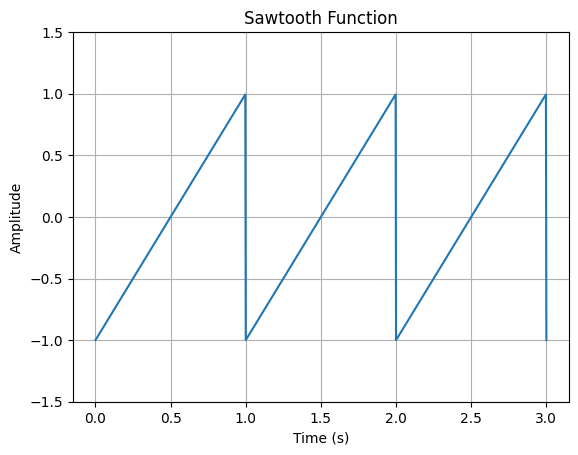

In [12]:
#creating time series and the sawtooth periodic function
t = np.linspace(0,3, 1000)
sawtooth = sig.sawtooth(w_0*t)

#plotting the square function
plt.plot(t, sawtooth, label='Sawtooth')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Sawtooth Function');

The coefficients are as follows:

$a_0 = 0$

$a_n = 0$

$b_n = \frac{-\pi n cos(2\pi n) - \pi n}{n^2 \pi^2}$

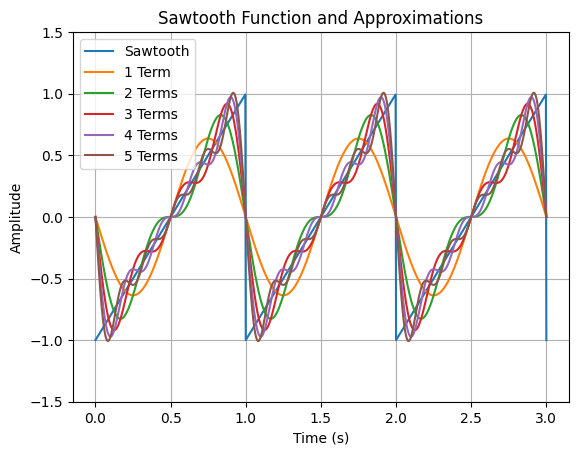

In [13]:
def coefficients(n):
    '''Take in the term number n, return the bn coefficient for this term'''
    return (-n*pi*np.cos(2*pi*n)-pi*n)/(n**2 * pi**2)

def n_term(n, t):
    '''Take in the term number and the time array, return the correct term for the fourier series, which 
    has been evaluated for the time array'''
    return coefficients(n) * np.sin(n* w_0 * t)

#calculate up to term 5
n_list = np.arange(1,6,1)
a_0 = 0
storage = []
for i in range(len(n_list)):
    term = n_term(n_list[i], t)
    storage.append(term)

#add all the terms together to get the series instead of each term individually
for i in range(5):
    if i ==0:
        storage[i] = a_0 + storage[i]
    else:
        storage[i] = storage[i-1] + storage[i]      

#plotting the square function and the approximations
plt.plot(t, sawtooth, label='Sawtooth')
plt.plot(t, storage[0], label = '1 Term')
plt.plot(t, storage[1], label = '2 Terms')
plt.plot(t, storage[2], label = '3 Terms')
plt.plot(t, storage[3], label = '4 Terms')
plt.plot(t, storage[4], label = '5 Terms')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Sawtooth Function and Approximations')
plt.legend();

In [14]:
for term in storage:
    print('Percent accuracy is:', accuracy(sawtooth, term), '%')

Percent accuracy is: 73.40040188426605 %
Percent accuracy is: 81.27415650295009 %
Percent accuracy is: 85.33209227342591 %
Percent accuracy is: 87.83522146093932 %
Percent accuracy is: 89.55241335976433 %


99% accurate with 114 terms.


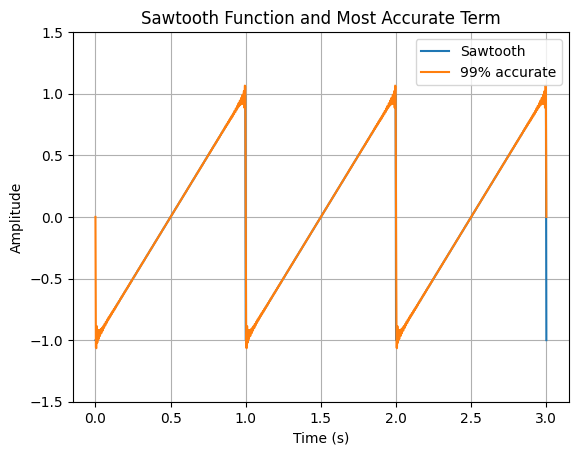

In [15]:
last_term, term_number = runtill_99(sawtooth, t)
print('99% accurate with', term_number, 'terms.')

#plotting the sawtooth function
plt.plot(t, sawtooth, label='Sawtooth')
plt.plot(t, last_term, label='99% accurate')
plt.ylim(-1.5,1.5)
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title('Sawtooth Function and Most Accurate Term')
plt.legend();

Now that I have 99% accuracy on the three periodic functions, I'll make a plot of how accuracy changes over time for each of the periodic functions. 

In [16]:
def square_coefficients(n):
    '''Take in the term number n, return the bn coefficient for this term'''
    return (2/(n*pi))*(1-np.cos(n*pi))

def square_n_term(n, t):
    '''Take in the term number and the time array, return the correct term for the fourier series, which 
    has been evaluated for the time array'''
    return square_coefficients(n) * np.sin(n* w_0 * t)

def triangle_coefficients(n):
    '''Take in the term number n, return the an coefficient for this term'''
    return (-2*(-1)**n +2)/(pi**2 * n**2)

def triangle_n_term(n, t):
    '''Take in the term number and the time array, return the correct term for the fourier series, which 
    has been evaluated for the time array'''
    return triangle_coefficients(n) * np.cos(n* w_0 * t)

def sawtooth_coefficients(n):
    '''Take in the term number n, return the bn coefficient for this term'''
    return (-n*pi*np.cos(2*pi*n)-pi*n)/(n**2 * pi**2)

def sawtooth_n_term(n, t):
    '''Take in the term number and the time array, return the correct term for the fourier series, which 
    has been evaluated for the time array'''
    return sawtooth_coefficients(n) * np.sin(n* w_0 * t)

In [21]:
square_accuracy = []
triangle_accuracy =[]
sawtooth_accuracy = []

#calculate up to term 250
n_list = np.arange(1,251,1)
sq_saw_a_0 = 0
tr_a_0 = 1/2

square_storage = []
triangle_storage = []
sawtooth_storage = []

for i in range(len(n_list)):
    sq_term = square_n_term(n_list[i], t)
    square_storage.append(sq_term)
    
    tr_term = triangle_n_term(n_list[i], times)
    triangle_storage.append(tr_term)
    
    saw_term = sawtooth_n_term(n_list[i], t)
    sawtooth_storage.append(saw_term)

#add all the terms together to get the series instead of each term individually
for i in range(250):
    if i ==0:
        square_storage[i] = sq_saw_a_0 + square_storage[i]
        triangle_storage[i] = tr_a_0 + triangle_storage[i]
        sawtooth_storage[i] = sq_saw_a_0 + sawtooth_storage[i]
    else:
        square_storage[i] = square_storage[i-1] + square_storage[i]
        triangle_storage[i] = triangle_storage[i-1] + triangle_storage[i]
        sawtooth_storage[i] = sawtooth_storage[i-1] + sawtooth_storage[i]

#calculate and store the accuracies
for term in square_storage:
    square_accuracy.append(accuracy(square, term))
for term in triangle_storage:
    triangle_accuracy.append(accuracy(triangle, term))
for term in sawtooth_storage:
    sawtooth_accuracy.append(accuracy(sawtooth, term))

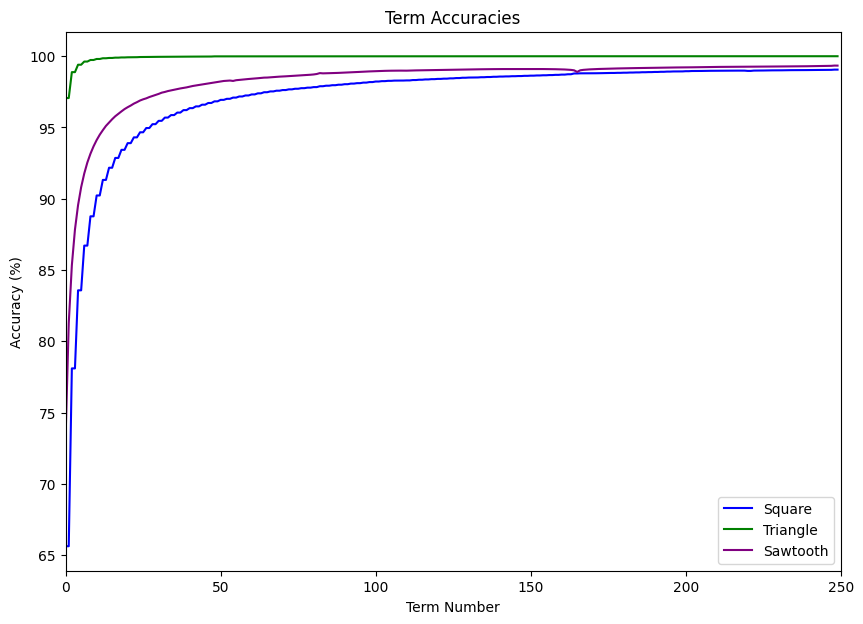

In [29]:
plt.figure(figsize=(10,7))
plt.plot(square_accuracy, color='blue', label='Square')
plt.plot(triangle_accuracy, color='green', label='Triangle')
plt.plot(sawtooth_accuracy, color='purple', label='Sawtooth')
plt.xlim(0,250)
plt.xlabel("Term Number")
plt.ylabel("Accuracy (%)")
plt.title('Term Accuracies')
plt.legend(loc='lower right')

Now I move on to exploring the behavior of these periodic functions in damped driven oscillators. The damping constant and initial conditions will be set to constant values for all of the oscillators, in order to ensure the only differences seen are from the periodic functions and their series. Only the square and sawtooth functions will be looked at here for simplicity sake, as the scipy package doesn't have a triangle function built in.

In [32]:
def driver_square(t, w0):
    """
    Function defining the driving force for the square periodic function.
    """
    return sig.square(w0 * t)

def DDHO_square(x, v, t, w0, beta):
    """
    Function to compute derivatives based on the damped driven oscillator model.
    """
    dxdt = v
    dvdt = -2 * beta * v - w0**2 * x + driver_square(t, w0)
    return dxdt, dvdt

def DDHO_square_series(x, v, t, w0, beta):
    """
    Function to compute derivatives based on the damped driven oscillator model.
    This uses the series instead of the periodic function, set to the term with 99% accuracy.
    """
    dxdt = v
    dvdt = -2 * beta * v - w0**2 * x + square_n_term(227, t)
    return dxdt, dvdt

###############################################################################

def driver_sawtooth(t, w0):
    """
    Function defining the driving force for the square periodic function.
    """
    return sig.sawtooth(w0 * t)

def DDHO_sawtooth(x, v, t, w0, beta):
    """
    Function to compute derivatives based on the damped driven oscillator model.
    """
    dxdt = v
    dvdt = -2 * beta * v - w0**2 * x + driver_sawtooth(t, w0)
    return dxdt, dvdt

def DDHO_sawtooth_series(x, v, t, w0, beta):
    """
    Function to compute derivatives based on the damped driven oscillator model.
    This uses the series instead of the periodic function, set to the term with 99% accuracy.
    """
    dxdt = v
    dvdt = -2 * beta * v - w0**2 * x + sawtooth_n_term(114, t)
    return dxdt, dvdt

###############################################################################


def RK2(f, tf, num_steps, w0, beta):
    '''
    Function to perform Runge-Rutta order 2 to solve for the position and velocity of the oscillator.
    '''
    v = 0
    x = 1
    X_values = []
    V_values = []
    h = tf/num_steps
    tpoints = np.arange(0,tf,h)
    for t in tpoints:
        X_values.append(x)
        V_values.append(v)
        k1x, k1v = f(x,v,t,w0,beta)
        k2x, k2v = f(x+h*k1x, v+h*k1v, t, w0, beta)
        x += h*(k2x+k1x)/2
        v += h*(k2v+k1v)/2
        
    return tpoints, X_values, V_values

In [36]:
#define initial conditions
tf = 10 
num_steps = 1000
beta = 0.5
w0 = 2*pi

#calculate the position and velocity of the oscillators
sq_t, sq_x, sq_v = RK2(DDHO_square, tf, num_steps, w0, beta)
sq_ser_t, sq_ser_x, sq_ser_v = RK2(DDHO_square_series, tf, num_steps, w0, beta)

saw_t, saw_x, saw_v = RK2(DDHO_sawtooth, tf, num_steps, w0, beta)
saw_ser_t, saw_ser_x, saw_ser_v = RK2(DDHO_sawtooth_series, tf, num_steps, w0, beta)

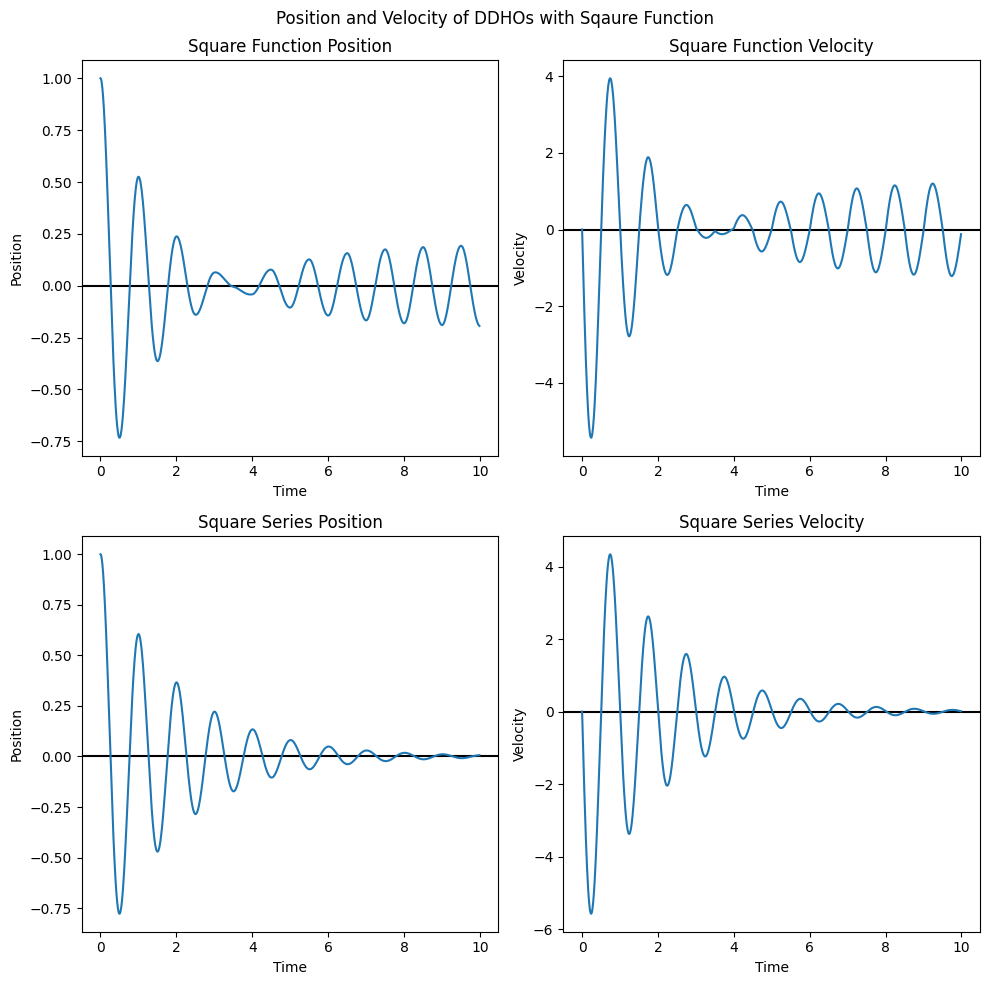

In [39]:
plt.figure(figsize=(10,10))
plt.suptitle('Position and Velocity of DDHOs with Sqaure Function')

plt.subplot(2,2,1)
plt.axhline(y=0, color='black')
plt.plot(sq_t, sq_x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Square Function Position')

plt.subplot(2,2,2)
plt.axhline(y=0, color='black')
plt.plot(sq_t, sq_v)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Square Function Velocity')

plt.subplot(2,2,3)
plt.axhline(y=0, color='black')
plt.plot(sq_ser_t, sq_ser_x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Square Series Position')

plt.subplot(2,2,4)
plt.axhline(y=0, color='black')
plt.plot(sq_ser_t, sq_ser_v)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Square Series Velocity')

plt.tight_layout()

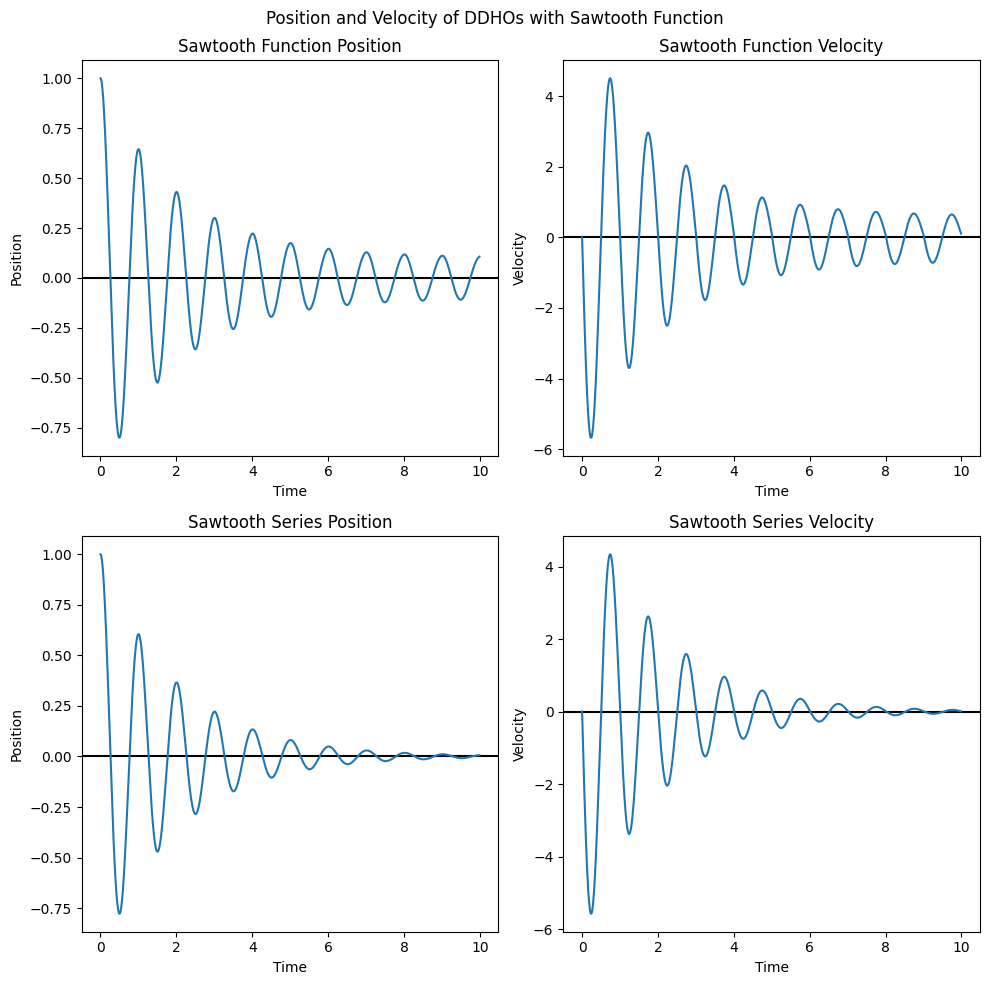

In [40]:
plt.figure(figsize=(10,10))
plt.suptitle('Position and Velocity of DDHOs with Sawtooth Function')

plt.subplot(2,2,1)
plt.axhline(y=0, color='black')
plt.plot(saw_t, saw_x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Sawtooth Function Position')

plt.subplot(2,2,2)
plt.axhline(y=0, color='black')
plt.plot(saw_t, saw_v)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Sawtooth Function Velocity')

plt.subplot(2,2,3)
plt.axhline(y=0, color='black')
plt.plot(saw_ser_t, saw_ser_x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Sawtooth Series Position')

plt.subplot(2,2,4)
plt.axhline(y=0, color='black')
plt.plot(saw_ser_t, saw_ser_v)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Sawtooth Series Velocity')

plt.tight_layout()

## Results and Discussion

_(What did you find when you carried out your methods? Some of your code related to presenting results/figures/data may be replicated from the methods section or may only be present in
this section.
All of the plots that you plan on using for your presentation should be present in this section)_

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   
Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. 
**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
